In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


# Data 2 Gaussien

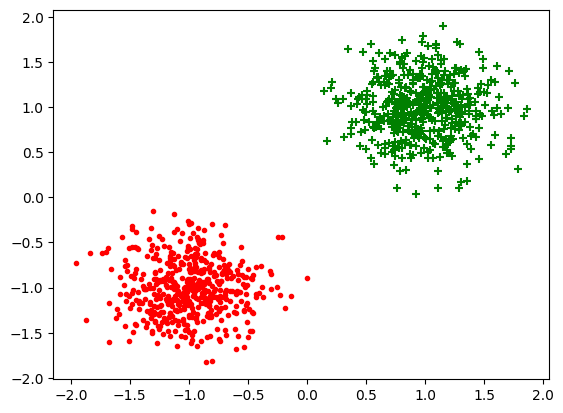

In [14]:
np.random.seed(0)
X, Y = gen_arti()
Y = np.where(Y==-1,0,1)
plot_data(X,Y)

Acc: 0.85


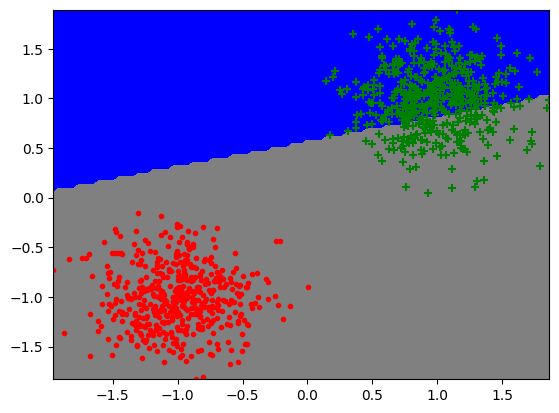

In [15]:
np.random.seed(6)
#ini
MLin1 = Linear(X.shape[1],2)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#forward
z_1 = MLin1.forward(X)
z_1_tan = MtanH.forward(z_1)
z_2 = MLin2.forward(z_1_tan)
z_2_sig = MSig.forward(z_2)
#decision
y_pred = np.where(z_2_sig>0.5,1,0)

def f_sig(X):
  A = MSig.forward(MLin2.forward(MtanH.forward(MLin1.forward(X))))
  return np.where(A>0.5,1,0)

#plot
plot_frontiere(X,f_sig,step=100)
plot_data(X,Y)
res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Iter 1, Accuracy: 0.872
Iter 2, Accuracy: 0.893
Iter 3, Accuracy: 0.912
Iter 4, Accuracy: 0.918
Iter 5, Accuracy: 0.933
Iter 6, Accuracy: 0.949
Iter 7, Accuracy: 0.956
Iter 8, Accuracy: 0.963
Iter 9, Accuracy: 0.967
Iter 10, Accuracy: 0.972


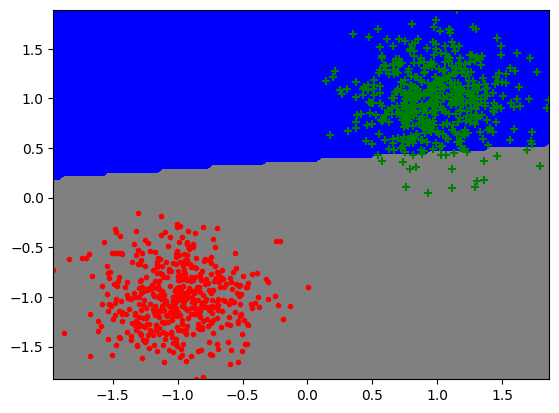

In [16]:
nbiter = 10
for i in range(nbiter):
  #Back propagation
  loss = MSELoss()
  delta_sortie = loss.backward(Y,z_2_sig)
  #Sig
  delta_sig = MSig.backward_delta(z_2,delta_sortie)
  #Lineaire 2
  MLin2.backward_update_gradient(z_1_tan,delta_sig)
  delta_2 = MLin2.backward_delta(z_1_tan, delta_sig)
  MLin2.update_parameters(gradient_step=1e-4)
  #TanH
  delta_tanH = MtanH.backward_delta(z_1,delta_2)
  #Lineaire 2
  MLin1.backward_update_gradient(X,delta_tanH)
  MLin1.update_parameters(gradient_step=1e-4)


  #forward
  z_1 = MLin1.forward(X)
  z_1_tan = MtanH.forward(z_1)
  z_2 = MLin2.forward(z_1_tan)
  z_2_sig = MSig.forward(z_2)
  #decision
  y_pred = np.where(z_2_sig>0.5,1,0)


  #plot
  plot_frontiere(X,f_sig,step=100)
  plot_data(X,Y)
  res = np.where(y_pred == Y, 1, 0).sum()
  print(f"Iter {i+1}, Accuracy:",res/len(Y))

## Data 4 Gaussiens

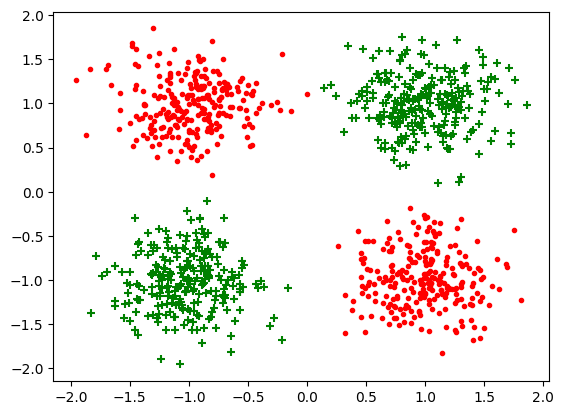

In [17]:
np.random.seed(0)
X, Y = gen_arti(data_type=1,nbex=1000)
Y = np.where(Y==-1,0,1)
plot_data(X,Y)

Acc: 0.726


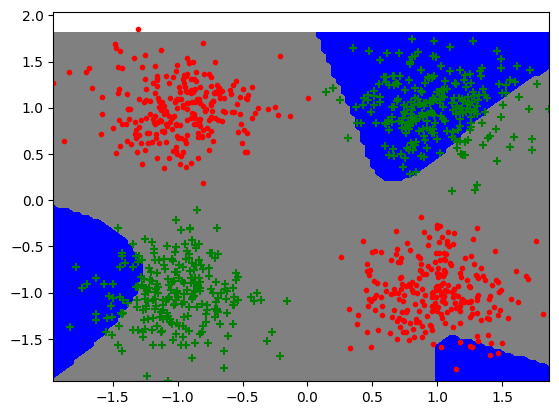

In [18]:
np.random.seed(6)
nb_couche_latentes = 30
#ini
MLin1 = Linear(X.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#forward
z_1 = MLin1.forward(X)
z_1_tan = MtanH.forward(z_1)
z_2 = MLin2.forward(z_1_tan)
z_2_sig = MSig.forward(z_2)
#decision
y_pred = np.where(z_2_sig>0.5,1,0)

def f_sig(X):
  A = MSig.forward(MLin2.forward(MtanH.forward(MLin1.forward(X))))
  return np.where(A>0.5,1,0)

#plot
plot_frontiere(X,f_sig,step=100)
plot_data(X,Y)
res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Iter 1, Accuracy: 0.767
Iter 2, Accuracy: 0.799
Iter 3, Accuracy: 0.829
Iter 4, Accuracy: 0.866
Iter 5, Accuracy: 0.902
Iter 6, Accuracy: 0.929
Iter 7, Accuracy: 0.956
Iter 8, Accuracy: 0.965
Iter 9, Accuracy: 0.977
Iter 10, Accuracy: 0.982


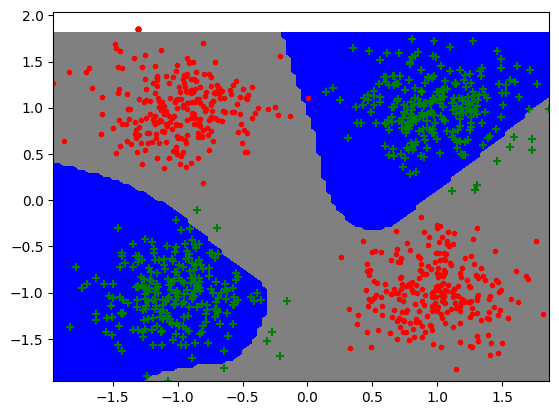

In [19]:
nbiter = 10
for i in range(nbiter):
  #Back propagation
  loss = MSELoss()
  delta_sortie = loss.backward(Y,z_2_sig)
  #Sig
  delta_sig = MSig.backward_delta(z_2,delta_sortie)
  #Lineaire 2
  MLin2.backward_update_gradient(z_1_tan,delta_sig)
  delta_2 = MLin2.backward_delta(z_1_tan, delta_sig)
  MLin2.update_parameters(gradient_step=1e-4)
  #TanH
  delta_tanH = MtanH.backward_delta(z_1,delta_2)
  #Lineaire 2
  MLin1.backward_update_gradient(X,delta_tanH)
  MLin1.update_parameters(gradient_step=1e-4)


  #forward
  z_1 = MLin1.forward(X)
  z_1_tan = MtanH.forward(z_1)
  z_2 = MLin2.forward(z_1_tan)
  z_2_sig = MSig.forward(z_2)
  #decision
  y_pred = np.where(z_2_sig>0.5,1,0)


  #plot
  plot_frontiere(X,f_sig,step=100)
  plot_data(X,Y)
  res = np.where(y_pred == Y, 1, 0).sum()
  print(f"Iter {i+1}, Accuracy:",res/len(Y))

## Data echiquier

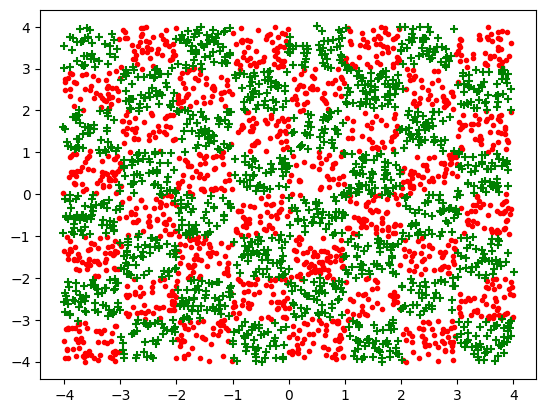

In [20]:
np.random.seed(0)
X, Y = gen_arti(data_type=2,nbex=3000)
Y = np.where(Y==-1,0,1)
plot_data(X,Y)

Acc: 0.49166666666666664


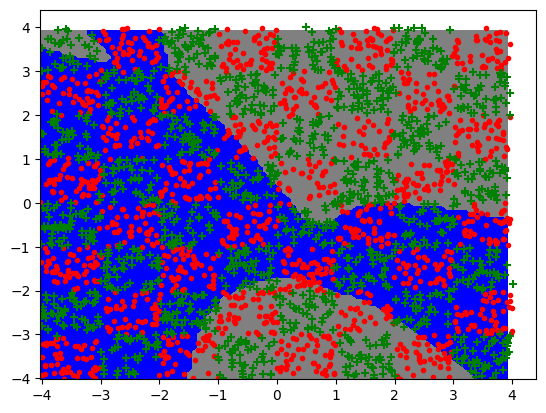

In [21]:
#np.random.seed(6)
nb_couche_latentes = 60
#ini
MLin1 = Linear(X.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#forward
z_1 = MLin1.forward(X)
z_1_tan = MtanH.forward(z_1)
z_2 = MLin2.forward(z_1_tan)
z_2_sig = MSig.forward(z_2)
#decision
y_pred = np.where(z_2_sig>0.5,1,0)

def f_sig(X):
  A = MSig.forward(MLin2.forward(MtanH.forward(MLin1.forward(X))))
  return np.where(A>0.5,1,0)

#plot
plot_frontiere(X,f_sig,step=100)
plot_data(X,Y)
res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Iter 1, Accuracy: 0.49166666666666664
Iter 2, Accuracy: 0.488
Iter 3, Accuracy: 0.49833333333333335
Iter 4, Accuracy: 0.5003333333333333
Iter 5, Accuracy: 0.5026666666666667
Iter 6, Accuracy: 0.5053333333333333
Iter 7, Accuracy: 0.5053333333333333
Iter 8, Accuracy: 0.503
Iter 9, Accuracy: 0.49966666666666665
Iter 10, Accuracy: 0.501


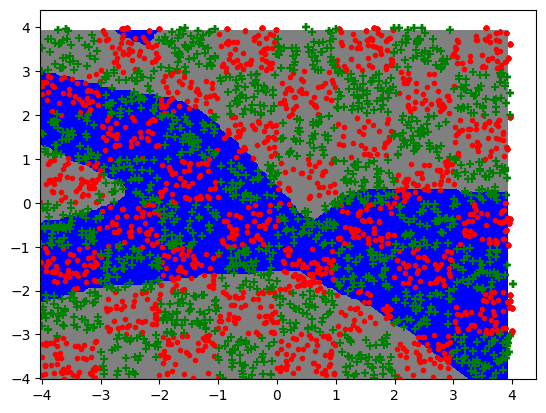

In [22]:
nbiter = 10

for i in range(nbiter):
  #Back propagation
  loss = MSELoss()
  delta_sortie = loss.backward(Y,z_2_sig)
  #Sig
  delta_sig = MSig.backward_delta(z_2,delta_sortie)
  #Lineaire 2
  MLin2.backward_update_gradient(z_1_tan,delta_sig)
  delta_2 = MLin2.backward_delta(z_1_tan, delta_sig)
  MLin2.update_parameters(gradient_step=1e-4)
  #TanH
  delta_tanH = MtanH.backward_delta(z_1,delta_2)
  #Lineaire 2
  MLin1.backward_update_gradient(X,delta_tanH)
  MLin1.update_parameters(gradient_step=1e-4)


  #forward
  z_1 = MLin1.forward(X)
  z_1_tan = MtanH.forward(z_1)
  z_2 = MLin2.forward(z_1_tan)
  z_2_sig = MSig.forward(z_2)
  #decision
  y_pred = np.where(z_2_sig>0.5,1,0)


  #plot
  plot_frontiere(X,f_sig,step=100)
  plot_data(X,Y)
  res = np.where(y_pred == Y, 1, 0).sum()
  print(f"Iter {i+1}, Accuracy:",res/len(Y))